In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
from scipy import stats
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('flight.csv')
df_edit = df.copy()

In [ ]:
display(df.head())

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

# NA, Fill, Duplicate

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

## Drop NA

In [ ]:
df_edit.dropna(subset=['WORK_PROVINCE'], inplace =True)

In [ ]:
len_df = len(df)
len_df_edit = len(df_edit)
persen = (len_df-len_df_edit)/(len_df)*100
print('data yang terhapus berjumlah: '+ str(round(persen,2)) + '%')

data yang terhapus berjumlah: 5.16%


## Fill Median and Mode

In [ ]:
df_edit.isna().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY            500
WORK_PROVINCE          0
WORK_COUNTRY           1
AGE                  328
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             530
SUM_YR_2             135
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [ ]:
#membagi kolom yang null : kategorikal atau numerikal
kategorikal = ['GENDER','WORK_CITY','WORK_COUNTRY']
numerical   = ['AGE','SUM_YR_1','SUM_YR_2']

for col in kategorikal :
    df_edit[col] = df_edit[col].fillna(df_edit[col].mode()[0])

df_edit[numerical] = df_edit[numerical].fillna(df_edit[numerical].median())

In [ ]:
df_edit.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Duplicate Data

In [ ]:
df_edit.duplicated().sum()

0

## Keanehan di Discount

nilai discount lebih dari 1

In [ ]:
persen = round((len(df_edit)-len(df_num[df_edit['avg_discount']<1]))/len(df_edit) *100,2)
print('ada data discount yang lebih dari 100 persen berjumlah :' + str(persen))
print('karena jumlah data yang lebih dari 100 persen tidak banyak maka dianggap outlier')

ada data discount yang lebih dari 100 persen berjumlah :5.73
karena jumlah data yang lebih dari 100 persen tidak banyak maka dianggap outlier


In [ ]:
#penghapusan data discount yang melebihi 1
df_edit = df_edit[df_edit['avg_discount']<=1]
df_edit['avg_discount'].describe()

count    57022.000000
mean         0.695734
std          0.144009
min          0.000000
25%          0.605482
50%          0.703496
75%          0.794531
max          1.000000
Name: avg_discount, dtype: float64

# Kolom Descriptive

In [ ]:
#membuat df.info menjadi datafram
#source def https://stackoverflow.com/questions/64067424/how-to-convert-df-info-into-data-frame-df-info
def infoOut(data,details=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo
df_info = infoOut(df_edit,details=False)

In [ ]:
#memisahkan kolom menjadi numerikal
df_num = df_info[df_info['Dtype'] != 'object'].reset_index()
df_num = df_edit[df_num['Column'].values]
#memisahkan kolom menjadi kategorikal
df_cat = df_info[df_info['Dtype'] == 'object'].reset_index()
df_cat = df_edit[df_cat['Column'].values]

## Numerikal

In [ ]:
df_num.describe(percentiles=[0.05,0.25,0.50,0.75,0.95])

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000,57022.000000
mean,31539.439602,4.084108,41.917242,11.758286,10096.792764,4963.086831,5250.246344,16847.696223,175.849655,67.644872,166.134211,0.304619,0.695734,11663.402459,2.806759
std,18192.182300,0.333306,9.613975,13.879848,14027.097505,7053.862895,7705.310474,20338.286116,183.473922,77.205280,123.275971,1.074167,0.144009,18018.737985,7.506145
min,3.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,3207.050000,4.000000,29.000000,2.000000,852.000000,0.000000,0.000000,2033.000000,4.000000,4.000000,4.000000,0.000000,0.436498,946.000000,0.000000
25%,15771.250000,4.000000,35.000000,3.000000,2450.000000,980.000000,770.000000,4743.000000,30.000000,23.438125,79.000000,0.000000,0.605482,2718.000000,0.000000
50%,31620.500000,4.000000,41.000000,7.000000,5506.000000,2747.500000,2711.500000,9941.500000,107.000000,44.666667,143.000000,0.000000,0.703496,6152.000000,0.000000
75%,47315.750000,4.000000,48.000000,15.000000,12202.750000,6244.000000,6572.750000,20979.750000,267.000000,82.000000,228.000000,0.000000,0.794531,13700.500000,1.000000
95%,59900.950000,5.000000,59.000000,39.000000,34544.900000,17596.900000,19447.850000,54527.950000,579.000000,208.500000,407.000000,2.000000,0.924684,39927.650000,20.000000
max,62988.000000,6.000000,110.000000,210.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.000000,985572.000000,140.000000


## Kategorikal

In [ ]:
df_cat.describe(include =object)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,57022,57022,57022,57022,57022,57022,57022,57022
unique,3060,3392,2,2825,1093,103,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,180,89,43266,9523,16919,53879,57022,877


In [ ]:
for col in df_cat.columns.to_list() :
    print('value_counts kolom ' + str(col))
    display(df_edit[col].value_counts().head(8))
    print()

value_counts kolom FFP_DATE


1/13/2011     180
1/1/2013      152
11/17/2010     95
3/1/2013       93
1/14/2011      86
9/19/2012      84
3/15/2012      84
10/16/2012     83
Name: FFP_DATE, dtype: int64


value_counts kolom FIRST_FLIGHT_DATE


2/16/2013    89
2/15/2013    81
9/30/2012    77
9/9/2005     74
4/21/2012    69
4/27/2012    67
5/26/2012    66
4/30/2012    66
Name: FIRST_FLIGHT_DATE, dtype: int64


value_counts kolom GENDER


Male      43266
Female    13756
Name: GENDER, dtype: int64


value_counts kolom WORK_CITY


guangzhou    9523
beijing      7073
shanghai     4649
shenzhen     3439
dalian       1920
shenyang     1558
changchun    1462
wulumuqi     1434
Name: WORK_CITY, dtype: int64


value_counts kolom WORK_PROVINCE


guangdong       16919
beijing          7299
shanghai         4769
liaoning         4026
xinjiang         2455
jilin            1744
heilongjiang     1385
hubei            1339
Name: WORK_PROVINCE, dtype: int64


value_counts kolom WORK_COUNTRY


CN    53879
KR      714
JP      676
US      421
HK      345
AU      213
MY      116
TW       71
Name: WORK_COUNTRY, dtype: int64


value_counts kolom LOAD_TIME


3/31/2014    57022
Name: LOAD_TIME, dtype: int64


value_counts kolom LAST_FLIGHT_DATE


3/31/2014    877
3/30/2014    842
3/28/2014    813
3/29/2014    707
3/27/2014    682
3/26/2014    659
3/21/2014    614
3/20/2014    599
Name: LAST_FLIGHT_DATE, dtype: int64

# Exploratory Data Analysis (EDA)

## Boxplot

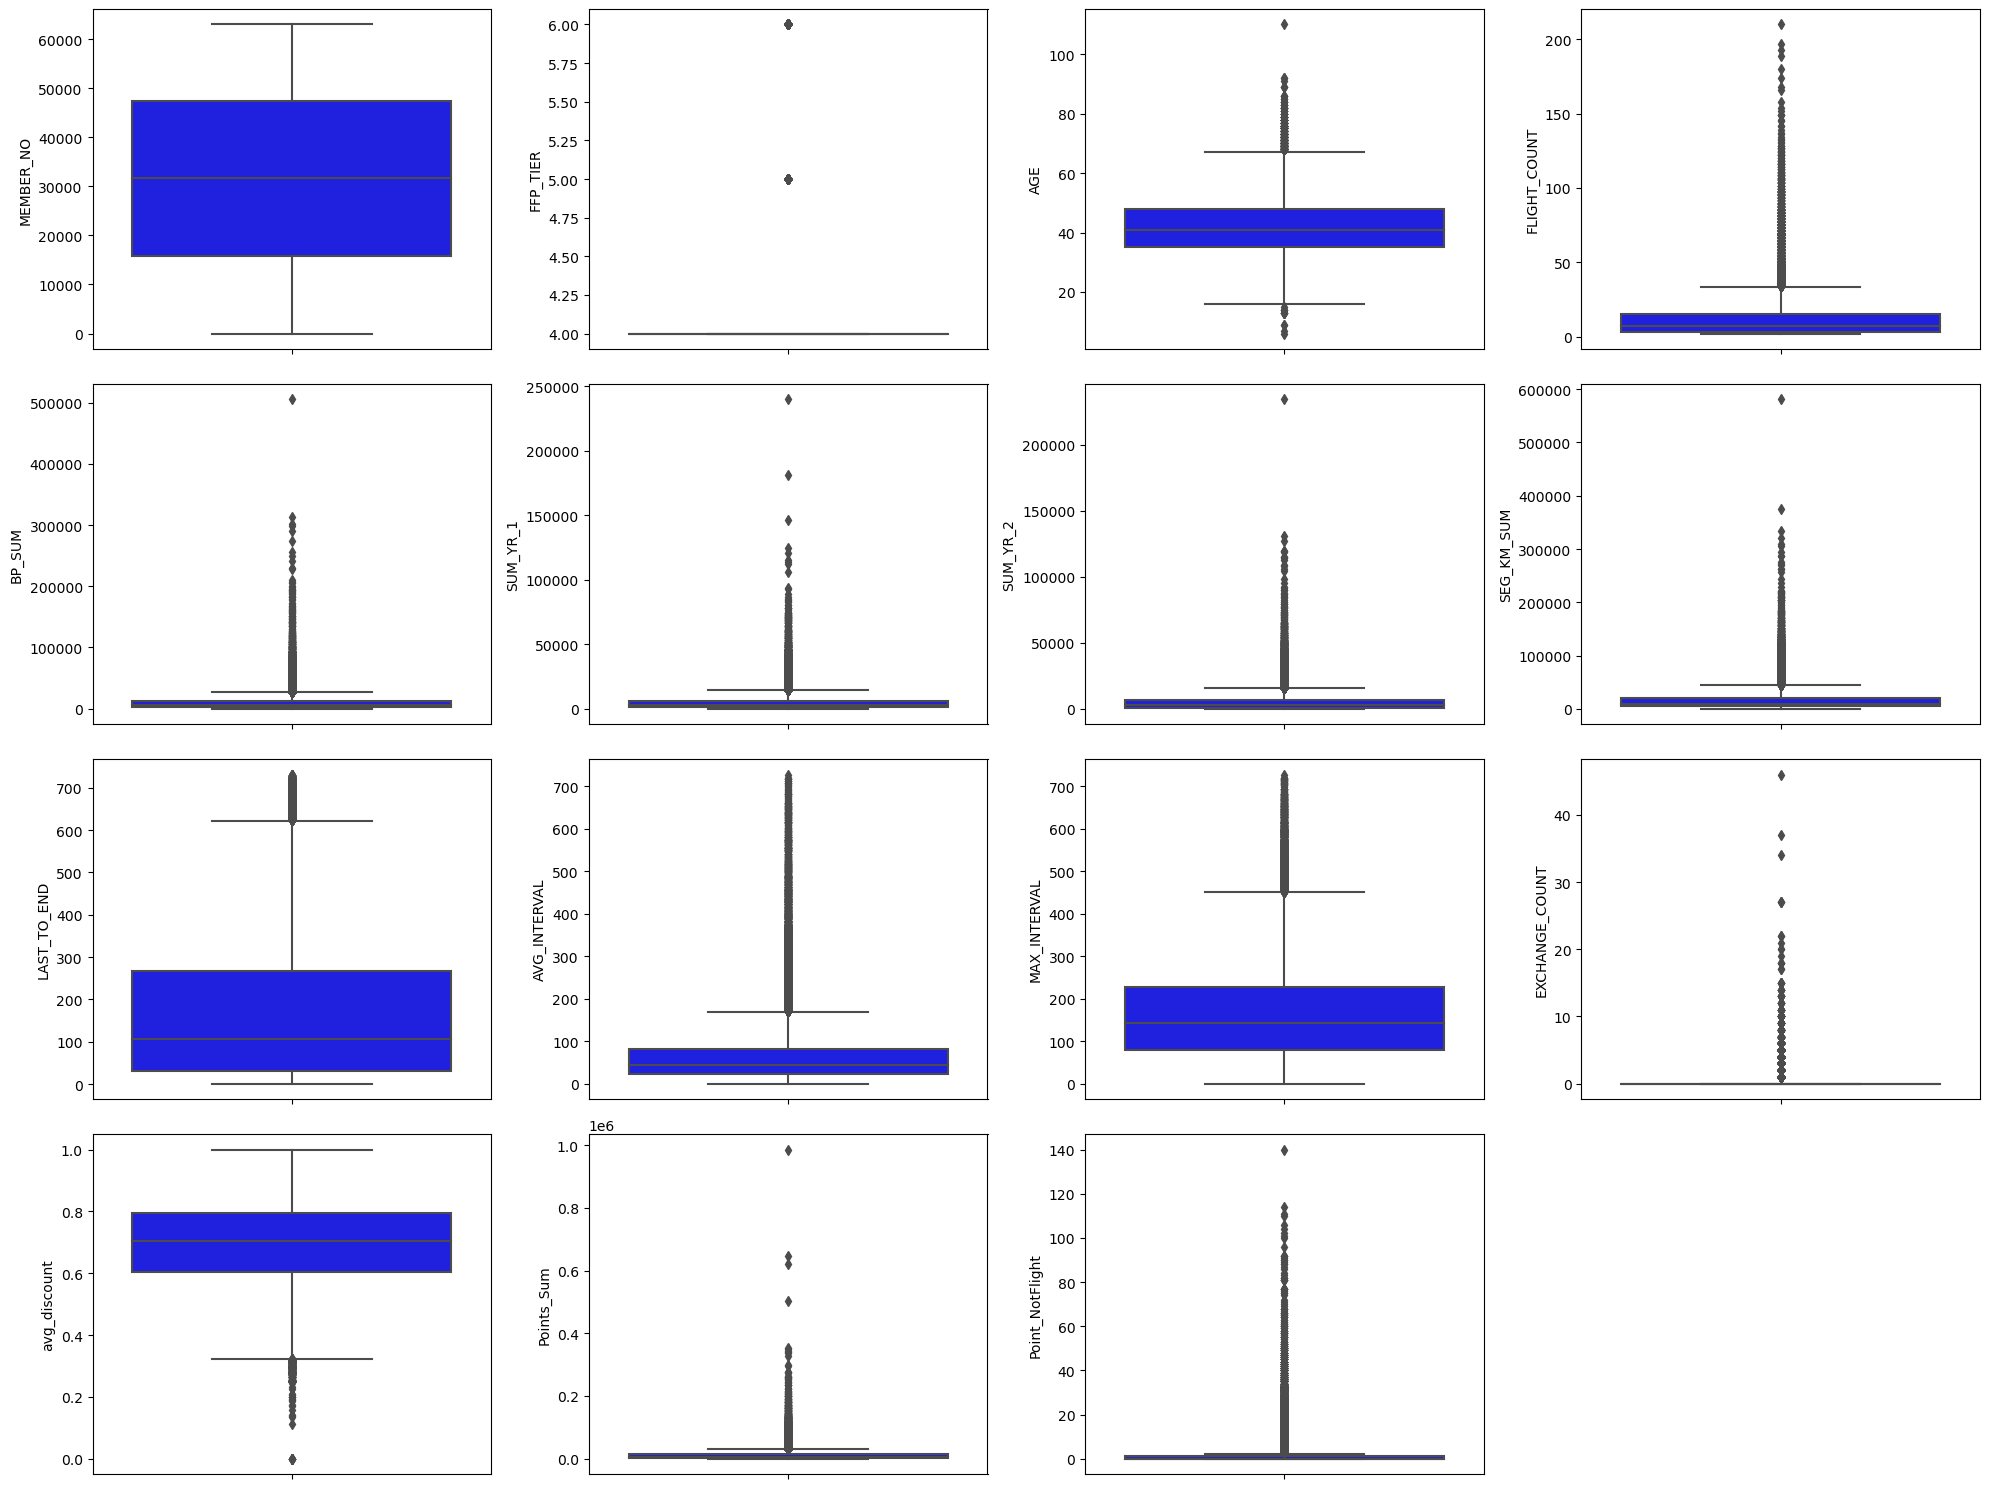

In [ ]:
features = df_num.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(20,15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df_num[features[i]], color='blue', orient='v')
  plt.tight_layout()

## Distribusi

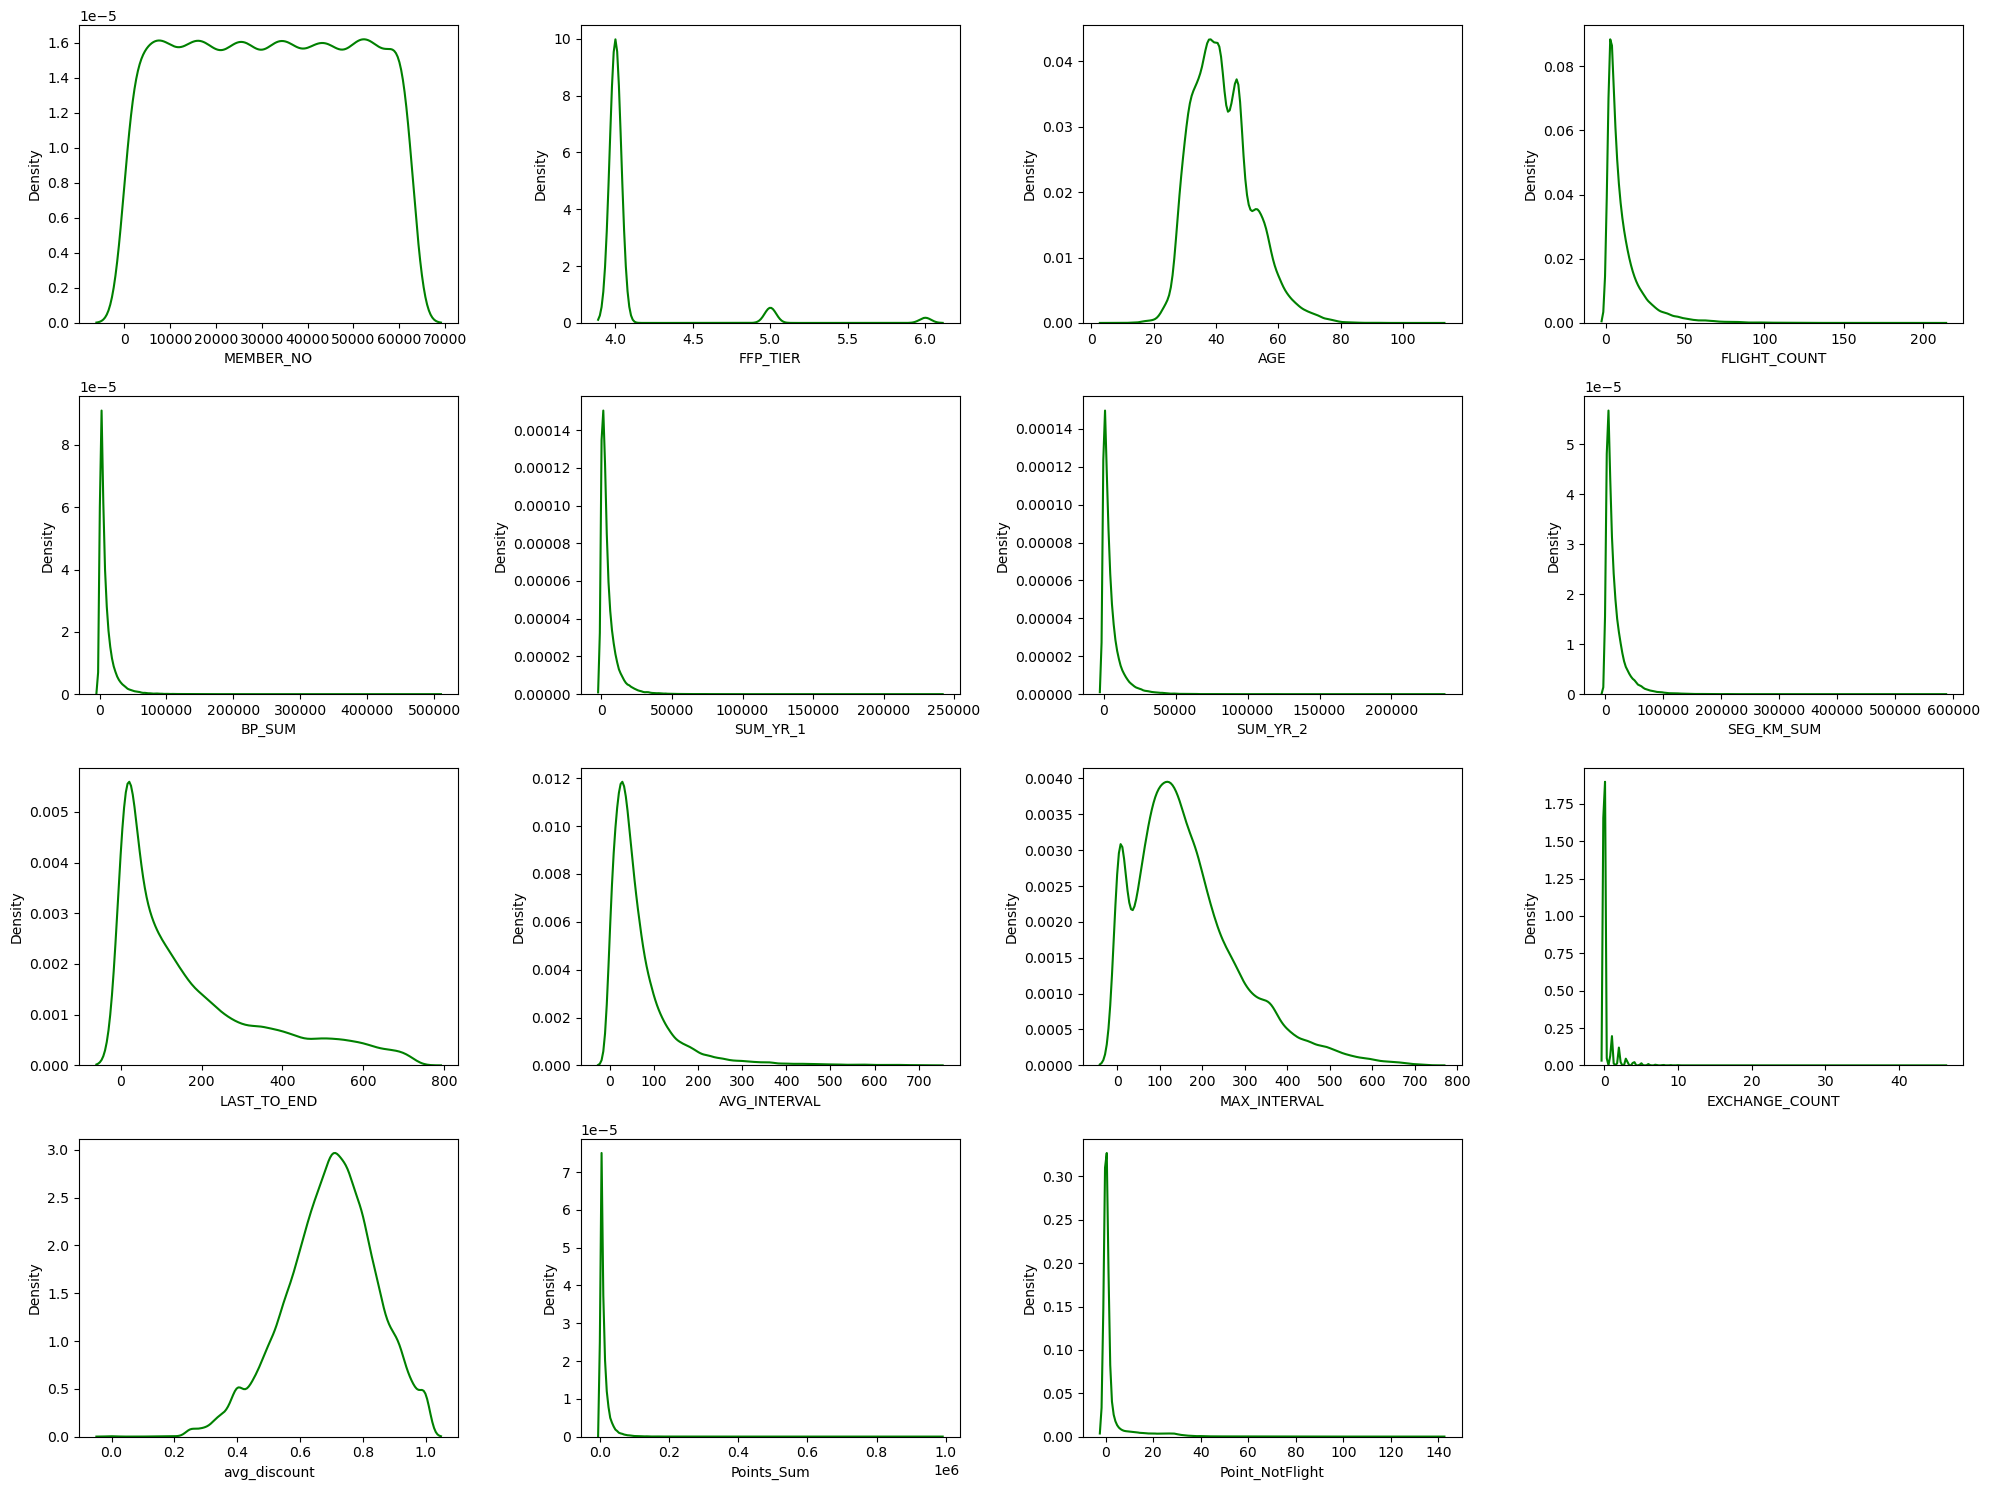

In [ ]:
features = df_num.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(20,15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x = df_num[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

## Correlation Matrix

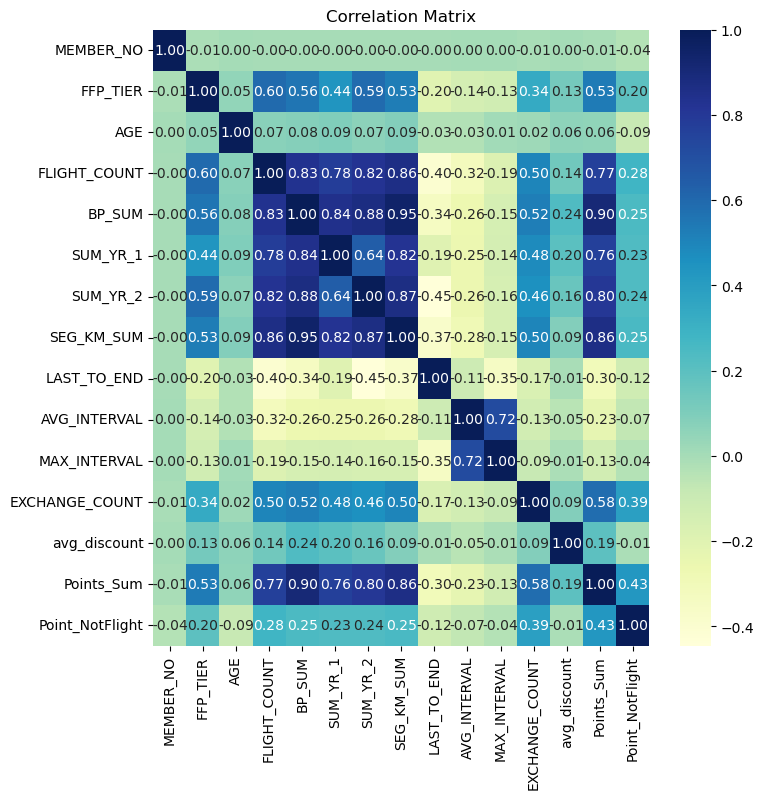

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Kesimpulan

a) Data Preprocessing awal :
- Pada daset yang tersedia terdapat sebanyak 62988 baris yang terdiri dari 23 kolom
- Semua data sesuai dengan jenis datanya masing-masing kecuali `FFP_TIER` kemungkinan kategorikal
- Ada beberapa tipe data yang belum sesuai terutama kolom kelompok time (`FFP_DATE`,`FIRST_FLIGHT_DATE`,
`LOAD_TIME`,`LAST_FLIGHT_DATE`), dan akan diubah kolom tersebut ke format datetime.
- Ada 7 kolom yang tidak memiliki nilai yaitu `GENDER` (3), `WORK_CITY` (2269) ,`WORK_PROVINCE` (3248), `WORK_COUNTRY` (26), `AGE` (420), `SUM_YR_1` (551), `SUM_YR_2` (138)
- Data yang memiliki na dihapus pada kolom WORK_PROVINCE sehingga keseluruhan data berkurang sebesar 5.16%
- Masih ada beberapa data yang kosong, data tersebut diisi menggunakan nilai `median` jika **numerical** dan `modus` jika **kategorikal**
- Tidak ada data duplikat pada dataset ini
- Kolom `LOAD_TIME` hanya memiliki 1 nilai unique<br>

b) Descriptive :
- Customer yang menggunakan layanan memiliki umur berkisar antara 31 sampai 56 tahun, dimana pada rentang umur berikut merupakan orang yang dalam golongan produktif
- FFP_Date / member terbanyak mendaftar pada tanggal 1/13/2011
- Penerbangan didominasi oleh laki-laki
- Customer kebanyakan bekerja di Negara China

c) EDA :
- Banyak data yang memiliki outlier
- Mayoritas data berdistribusi Positively Skewed kecuali kolom `avg_discount` yang berdistribusi normal<br>
- Golongan kolom yang memiliki korelasi rendah adalah `MEMBER_NO`, `AGE`, `MAX_INTERVAL`, `Point_NotFlight`
- Terdapat banyak data yang memiliki korelasi yang sangat kuat yang kemungkinan menjadi data redundant<br>
- `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`,`SEG_KM_SUM`, dan `Points_Sum` berkorelasi kuat satu sama lain.<br>
- `AVG_INTERVAL` dan `MAX_INTERVAL` berkorelasi kuat satu sama lain.<br>
-  Pada data redundan akan digunakan salah satu dan drop yang lain<br>
- `AGE`, `MEMBER_NO`,`AVG_INTERVAL`, `MAX_INTERVAL` akan di drop karena memiliki korelasi yang rendah dengan fitur lain<br>

# Pemilihan Fitur

Pemilihan fitur untuk clustering mengunakan analisis LRFMC. Analisis LRFMC adalah versi lanjutan dari analisis RFM yang telah digunakan dalam industri penerbangan selama bertahun-tahun untuk membagi pelanggan menjadi beberapa segmen. Berdasarkan analisis LRFMC membutuhkan 5 variabel:
- L (LOYALTY) : Lama waktu passenger menjadi membership (dalam bulan) diketahui dari selisih dari waktu observasi dengan waktu menjadi membership, pada data ini dapat direpresentasikan dengan fitur `LOAD_DATE` - `FFP_DATE` (Nama fitur baru adalah `MEMBER_DUR`).
- R (RECENCY) : Jumlah hari sejak penerbangan terakhir passenger dari akhir waktu observasi,pada data ini dapat direpresentasikan dengan fitur `LAST_TO_END`
- F (FREQUENCY) : Total berapa kali passenger telah terbang selama periode observasi per tahun, pada data ini dapat direpresentasikan dengan fitur `FLIGHT_COUNT/YEAR`
- M (MONETERY) : Miles atau jarak yang terakumulasi selama waktu observasi passenger,pada data ini dapat direpresentasikan dengan fitur `SEG_KM_SUM`
- C (DISCOUNT) : Nilai rata-rata discount factor yang digunakan passenger selama periode observasi,pada data ini dapat direpresentasikan dengan fitur `avg_discount`.

- Referensi:

https://iopscience.iop.org/article/10.1088/1742-6596/1168/3/032086/pdf

https://www.ijser.in/archives/v10i5/SE22525122734.pdf


## Penambahan Fitur

In [ ]:
# L (lOYALTY)
df_edit['FFP_DATE'] = pd.to_datetime(df_edit['FFP_DATE'], format='%m/%d/%Y')
df_edit['LOAD_TIME'] = pd.to_datetime(df_edit['LOAD_TIME'], format='%m/%d/%Y')

In [ ]:
#`LOAD_DATE` - `FFP_DATE`
selisih_tahun = df_edit['LOAD_TIME'].dt.year-df_edit['FFP_DATE'].dt.year
selisih_bulan = df_edit['LOAD_TIME'].dt.month-df_edit['FFP_DATE'].dt.month
df_num['MEMBER_DUR'] = selisih_tahun*12+selisih_bulan

In [ ]:
#F (FREQUENCY)
df_num['year']=round(df_num['MEMBER_DUR']/12)
df_num['FLIGHT_COUNT/YEAR'] = round(df_num['FLIGHT_COUNT']/df_num['year'])
df_num['FLIGHT_COUNT/YEAR'].head()

0    30.0
4    30.0
5    15.0
6    13.0
7    18.0
Name: FLIGHT_COUNT/YEAR, dtype: float64

## Pemilihan Fitur
- L (LOYALTY) = MEMBER_DUR
- R (RECENCY) = LAST_TO_END
- F (FREQUENCY) = FLIGHT_COUNT/YEAR
- M (MONETERY) = SEG_KM_SUM
- C (DISCOUNT) = avg_discount

In [ ]:
x=['MEMBER_DUR','LAST_TO_END','FLIGHT_COUNT/YEAR','SEG_KM_SUM','avg_discount'] #fitur apa aja yang dipake
df_feature = df_num[x].copy() #fitur apa aja yang dipake

#nyoba
#df_feature = df_num.loc[:, ~df_num.columns.isin(['MEMBER_NO', 'FFP_TIER'])].copy()

# Data Pre-processing Lanjutan

In [ ]:
#Using Z-score for outlier removal

for col in numerical:
    z_scores = np.abs(stats.zscore(df_num[col]))
    filter_mask_z = (z_scores < 3)  # Adjust the threshold as needed
    df_feature = df_feature[filter_mask_z]


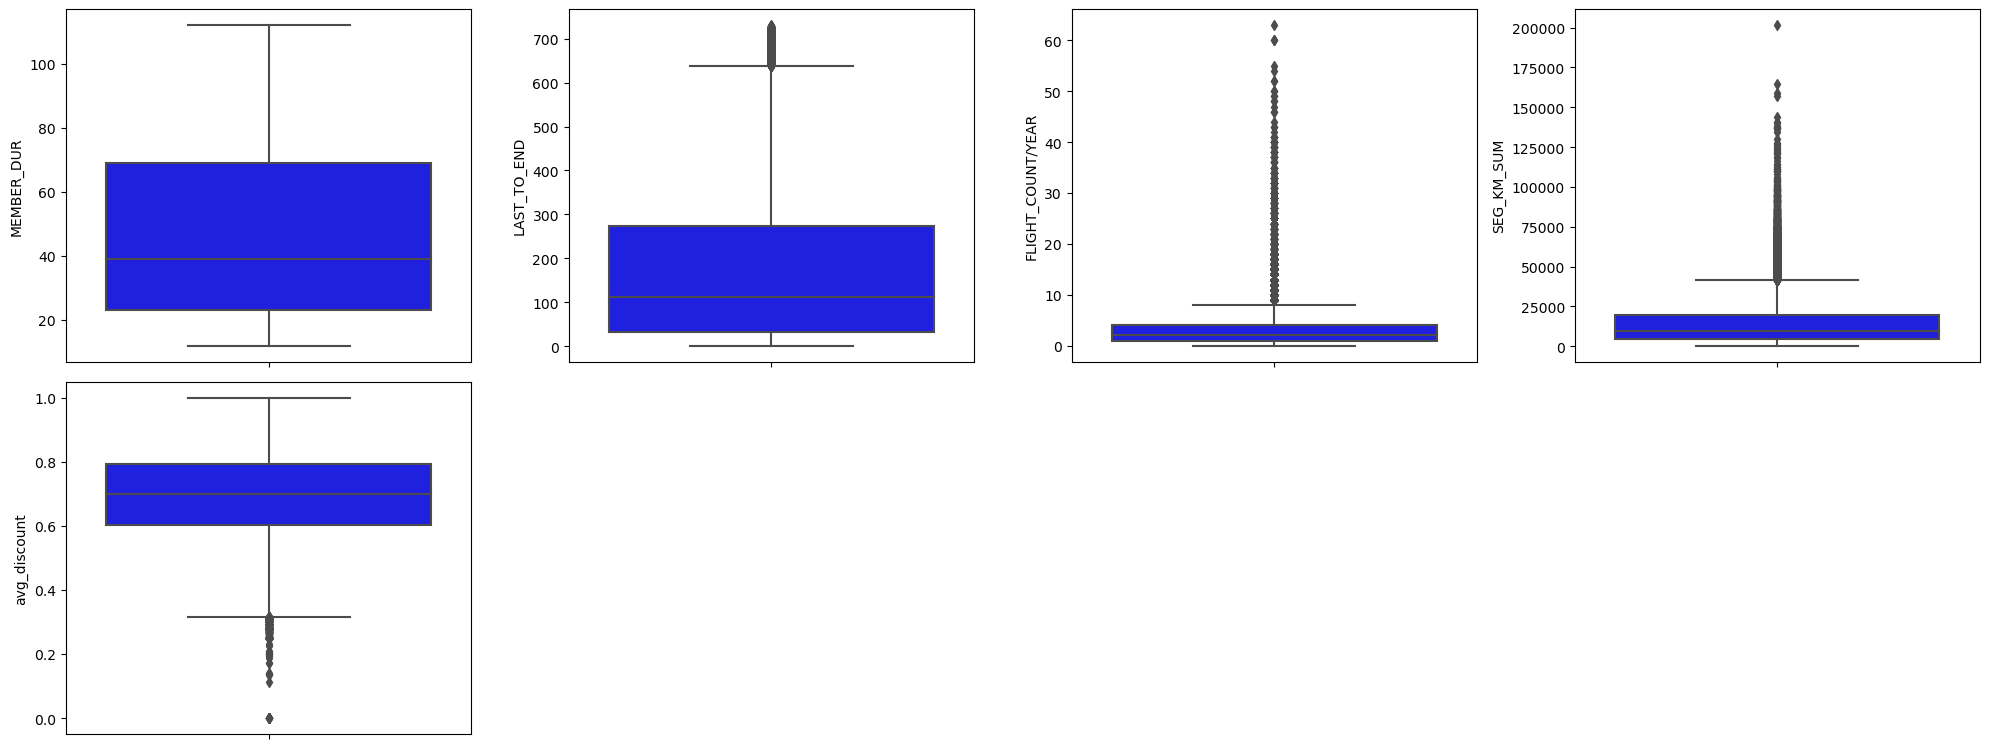

In [ ]:
features = df_feature.columns  #Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(20,15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df_feature[features[i]], color='blue', orient='v')
  plt.tight_layout()

In [ ]:
df_feature.describe()

,MEMBER_DUR,LAST_TO_END,FLIGHT_COUNT/YEAR,SEG_KM_SUM,avg_discount
count,54799.000000,54799.000000,54799.000000,54799.000000,54799.000000
mean,46.742057,179.973996,3.528860,14577.964762,0.693141
std,27.236416,183.932517,4.195856,14431.690505,0.144469
min,12.000000,1.000000,0.000000,368.000000,0.000000
25%,23.000000,32.000000,1.000000,4640.000000,0.601979
50%,39.000000,112.000000,2.000000,9526.000000,0.700223
75%,69.000000,274.000000,4.000000,19440.000000,0.792424
max,112.000000,731.000000,63.000000,201613.000000,1.000000


In [ ]:
len_initial   = len(df)
len_deleteNAN = len(df_num)
len_after     = len(df_feature)
persen_from_initial   = (len_initial - len_after)/len_initial *100
persen_from_deletenan = (len_deleteNAN - len_after)/len_deleteNAN *100
print('persen data yang hilang terhitung dari df asli :' + str(round(persen_from_initial,1))+'% ','dari '+str(len_initial)+' jadi '+str(len_after))

persen data yang hilang terhitung dari df asli :13.0%  dari 62988 jadi 54799


## Feature Transformation, Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_feature_norm = scaler.fit_transform(df_feature)
df_feature_norm = pd.DataFrame(df_feature_norm, columns=df_feature.columns)

#output
df_feature_1 = df_feature_norm
df_feature_1.describe()

,MEMBER_DUR,LAST_TO_END,FLIGHT_COUNT/YEAR,SEG_KM_SUM,avg_discount
count,5.479900e+04,5.479900e+04,5.479900e+04,54799.000000,5.479900e+04
mean,7.053692e-17,1.659692e-17,4.149230e-17,0.000000,1.120292e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00
min,-1.275585e+00,-9.730505e-01,-8.410423e-01,-0.984645,-4.797907e+00
25%,-8.717107e-01,-8.045089e-01,-6.027097e-01,-0.688627,-6.310252e-01
50%,-2.842565e-01,-3.695628e-01,-3.643771e-01,-0.350064,4.901885e-02
75%,8.172201e-01,5.112030e-01,1.122880e-01,0.336903,6.872340e-01
max,2.396003e+00,2.995833e+00,1.417391e+01,12.960141,2.124071e+00


# Jumlah cluster (elbow method)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#menghitung inertia untuk mendapatkan cluster terbaik
inertia = []

for i in range (1,11) :
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 0)
    kmeans.fit(df_feature_1)
    inertia.append(kmeans.inertia_)

## Tabel Inertia

In [ ]:
df_inertia = pd.DataFrame(inertia, columns=['inertia'])
df_inertia['delta_inertia'] = round(df_inertia.inertia - df_inertia['inertia'].shift(-1),1)
df_inertia['persen_delta'] = round(df_inertia['delta_inertia']/df_inertia['inertia'] *100,1)
df_inertia

,inertia,delta_inertia,persen_delta
0,273995.000000,63675.5,23.2
1,210319.462560,39155.4,18.6
2,171164.105473,29980.9,17.5
3,141183.182133,18275.2,12.9
4,122908.031318,15393.7,12.5
5,107514.362432,8866.0,8.2
6,98648.397195,8156.3,8.3
7,90492.109264,6520.2,7.2
8,83971.872375,4741.3,5.6
9,79230.527793,NaN,NaN


In [ ]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    23.239671
1    18.617087
2    17.515894
3    12.944283
4    12.524543
5     8.246308
6     8.268039
7     7.205310
8     5.646349
9          NaN
dtype: float64

## Plot Grafik

<function matplotlib.pyplot.show(close=None, block=None)>

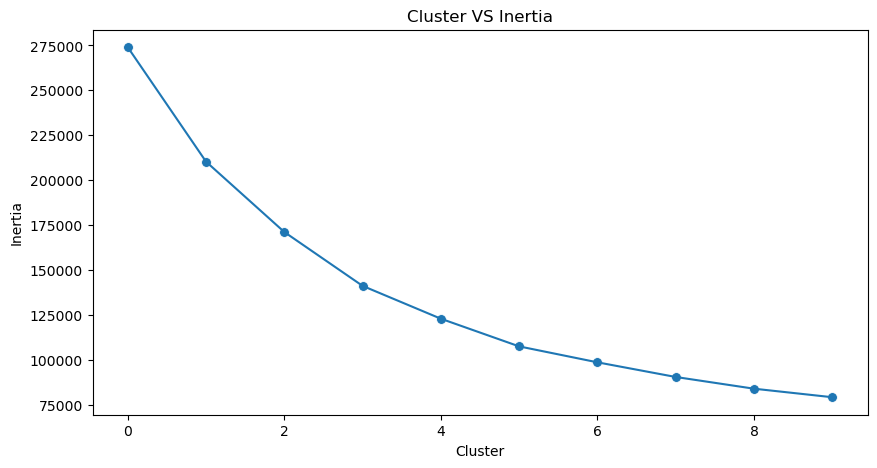

In [ ]:
#plot grafik
plt.figure(figsize=(10,5))
plt.title('Cluster VS Inertia')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
sns.lineplot(inertia)
sns.scatterplot(inertia,s=50)
plt.show

For n_clusters = 2, silhouette score is 0.2736635356025175)
For n_clusters = 3, silhouette score is 0.23133431840056243)
For n_clusters = 4, silhouette score is 0.245364569251633)
For n_clusters = 5, silhouette score is 0.24050309229531774)


<Axes: >

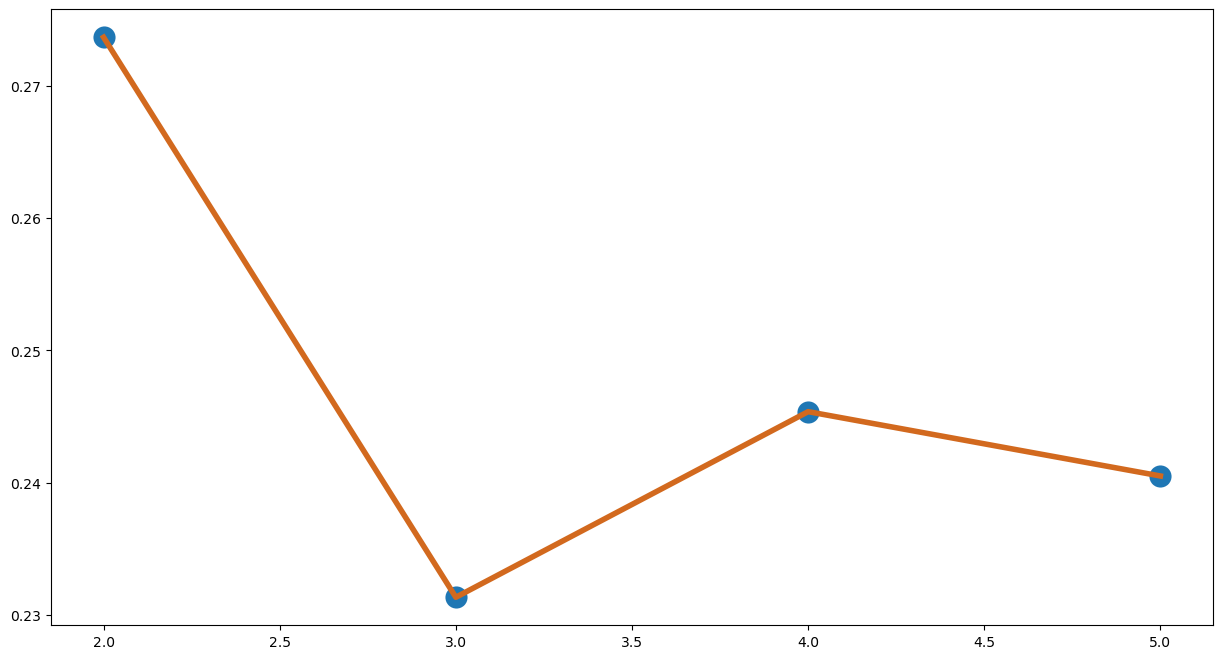

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    clusters = kmeans.fit(df_feature_1)
    preds = clusters.predict(df_feature_1)

    score = silhouette_score(df_feature_1, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))

plt.figure(figsize=(15, 8))

sns.lineplot(x=range(2, 6), y=silhouette, color='chocolate', linewidth = 4)
sns.scatterplot(x=range(2, 6), y=silhouette, s=300)

# Pemilihan Jumlah Cluster

In [ ]:
# Pemilihan Jumlah Cluster
cluster = 4
kmeans = KMeans(n_clusters=cluster,random_state=0)
kmeans.fit(df_feature_1)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Hasil Clustering
df_feature['class'] =kmeans.labels_
df_feature.head()

,MEMBER_DUR,LAST_TO_END,FLIGHT_COUNT/YEAR,SEG_KM_SUM,avg_discount,class
137,52,12,25.0,140188,0.996903,2
147,60,18,4.0,201613,0.681332,2
250,30,2,42.0,140535,0.827823,2
305,75,56,4.0,164336,0.654477,2
331,32,23,32.0,136246,0.771855,2


# Visualisasi dengan PCA

In [ ]:
# Visualisasi dengan PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(df_feature_1)
list_pca = pca.transform(df_feature_1)
df_pca   = pd.DataFrame(list_pca, columns =['PCA1','PCA2'])
df_pca['class'] = kmeans.labels_

<Axes: xlabel='PCA1', ylabel='PCA2'>

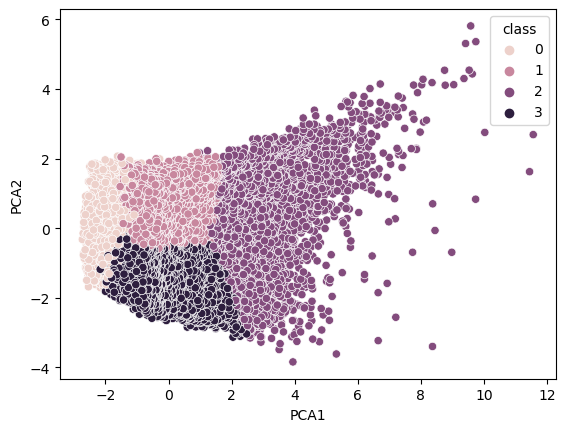

In [ ]:
sns.scatterplot(df_pca,x='PCA1',y='PCA2',hue='class')

# Statistik Fitur Setiap Cluster

In [ ]:
df_feature.head()

,MEMBER_DUR,LAST_TO_END,FLIGHT_COUNT/YEAR,SEG_KM_SUM,avg_discount,class
137,52,12,25.0,140188,0.996903,2
147,60,18,4.0,201613,0.681332,2
250,30,2,42.0,140535,0.827823,2
305,75,56,4.0,164336,0.654477,2
331,32,23,32.0,136246,0.771855,2


In [ ]:
display(df_feature.groupby('class').agg(['mean','median']))

MEMBER_DUR        LAST_TO_END        FLIGHT_COUNT/YEAR         \
            mean median        mean median              mean median   
class                                                                 
0      39.327788   33.0  484.719831  479.0          1.438430    1.0   
1      28.958872   28.0  114.830240   98.0          3.491627    3.0   
2      37.884870   30.0   44.918688   22.0         11.406117   10.0   
3      79.730259   79.0  104.814007   76.0          1.676362    1.0   

         SEG_KM_SUM          avg_discount            
               mean   median         mean    median  
class                                                
0       5513.649503   4154.0     0.702406  0.714273  
1      10259.891455   8641.0     0.671388  0.681353  
2      40607.418762  37639.0     0.714648  0.713487  
3      15627.579985  12592.0     0.706179  0.710842

# Deskripsi Setiap Cluster

1. **Kelompok 0: "Low-Activity Loyals"**
   - Pelanggan dalam kelompok ini memiliki durasi keanggotaan yang cukup lama, tetapi aktivitas terbang dan jarak terbang yang rendah. Mereka memberikan diskon yang moderat, tetapi mungkin memiliki kecenderungan untuk tetap setia meskipun dengan aktivitas terbang yang rendah.

2. **Kelompok 1: "Occasional Flyers"**
   - Pelanggan dalam kelompok ini memiliki tingkat aktivitas yang lebih rendah, terlihat dari jumlah penerbangan per tahun dan jarak terbang yang rendah. Mereka juga cenderung memberikan diskon yang lebih tinggi. Kelompok ini mungkin terdiri dari pelanggan yang hanya terbang secara sporadis atau untuk tujuan tertentu.
   
3. **Kelompok 2: "Variety Explorers"**
   - Pelanggan dalam kelompok ini memiliki variasi tinggi dalam semua atribut, termasuk durasi keanggotaan, waktu terakhir terbang, jumlah penerbangan per tahun, jarak terbang, dan diskon yang diberikan. Mereka cenderung memiliki pengalaman penerbangan yang beragam.
   
4. **Kelompok 3: "Long-Term Explorers"**
   - Pelanggan dalam kelompok ini memiliki durasi keanggotaan yang relatif lama, tetapi terlihat bahwa aktivitas terbang (jumlah penerbangan per tahun) dan diskon yang diberikan lebih rendah. Mereka mungkin merupakan pelanggan setia yang tidak terlalu sering terbang.


# Rekomendasi Bisnis

1. Untuk kelompok Low-Activity Loyals diberlakukan pengurangan jumlah discount dikarenakan walaupun jumlah discount yang diberikan relatif tinggi namun kelompok ini masih tidak berminat untuk meningkatkan frekuensi atau aktivitas terbang. Hal ini bertujuan untuk mengurangi marketing cost yang tidak efektif.

2. Untuk kelompok Variety Explorers dan Long-Term Explorers diberlakukan program membership khusus atau program loyalitas khusus yang berbeda setiap kelompoknya. Kelompok Long-Term Explorers hanya melakukan penerbangan pada saat-saat tertentu seperti liburan panjang dimana penumpang membawa banyak barang sehingga diberikan discount biaya penambahan kapasitas bagasi. Kelompok Variety Explorers dengan frekuensi penerbangan yang cukup tinggi, diberikan executive lounge access pada setiap keberangkatan.